In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train_BRCpofr.csv')
df.shape

(89392, 12)

In [3]:
test = pd.read_csv('test_koRSKBP.csv')
test.shape

(59595, 11)

In [395]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [396]:
df['qualification'].unique()

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [397]:
df.shape

(89392, 12)

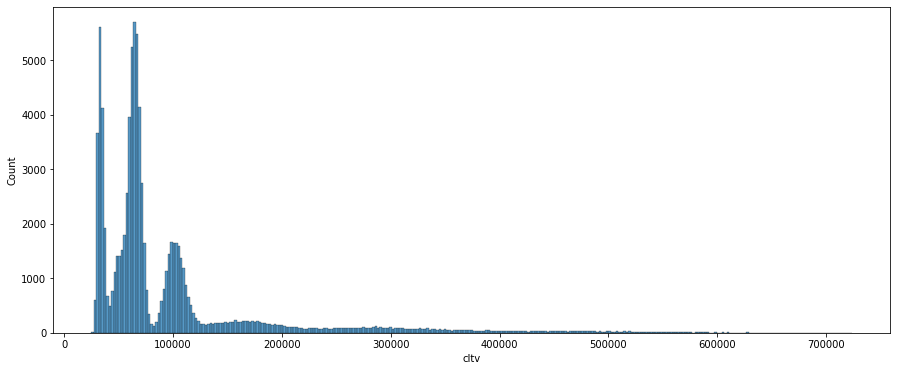

In [398]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='cltv')
plt.show()

In [399]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [400]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [402]:
df['id'].nunique()

89392

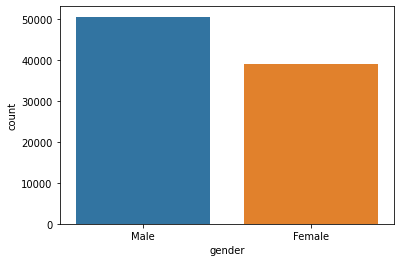

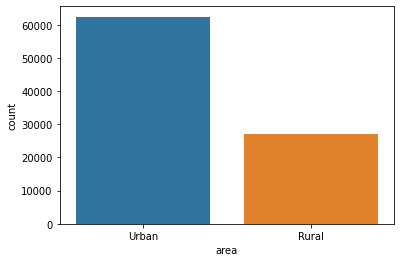

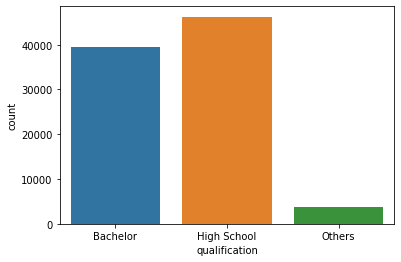

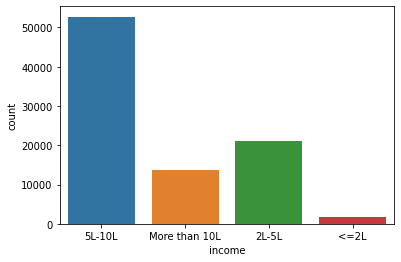

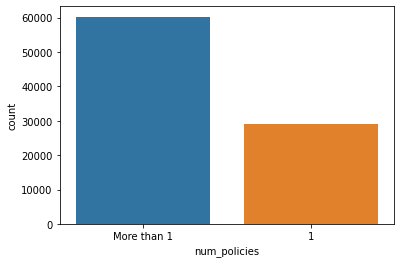

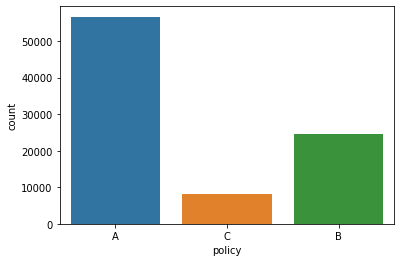

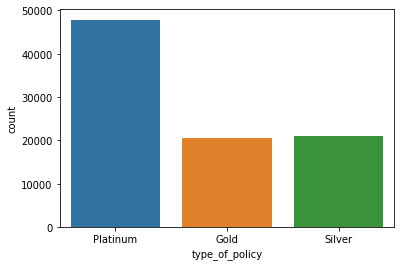

In [403]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
for col in cat_col:
    fig, ax = plt.subplots()
    sns.countplot(data=df, x=col, ax=ax)
    plt.show()

In [404]:
df['gender'].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

In [405]:
df['area'].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [406]:
df['qualification'].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [407]:
df['income'].value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [408]:
df['marital_status'].value_counts()

1    51444
0    37948
Name: marital_status, dtype: int64

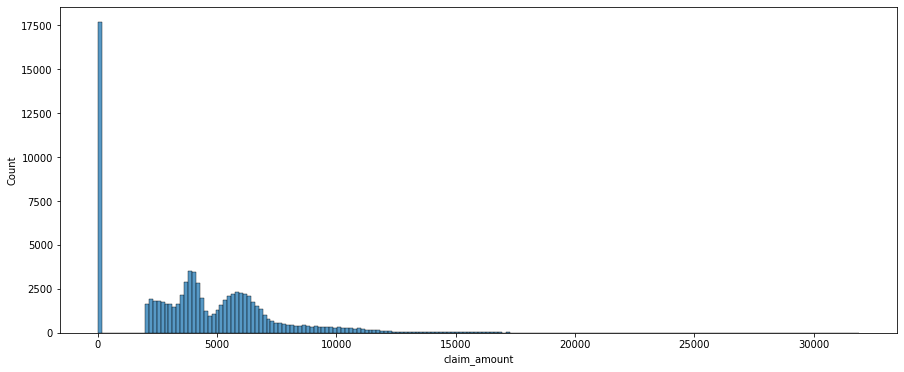

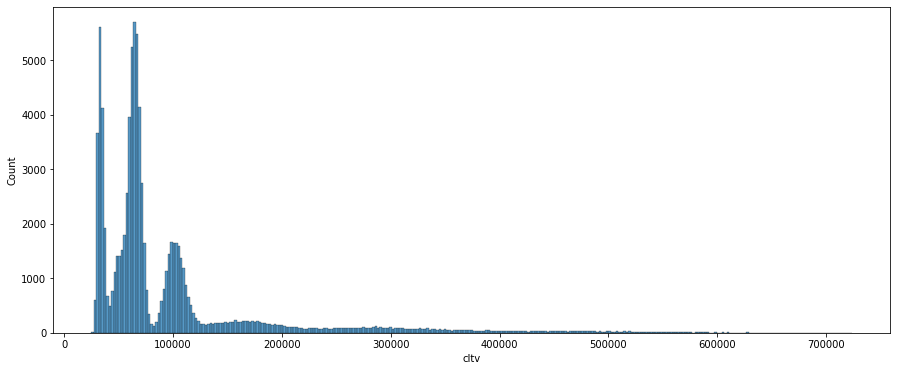

In [409]:
cols_1 = df[['id', 'marital_status', 'vintage']]
num_col = [col for col in df.columns if df[col].dtypes == 'int64' if col not in cols_1]
for col in num_col:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.histplot(data=df, x=col, ax=ax)
    plt.show()

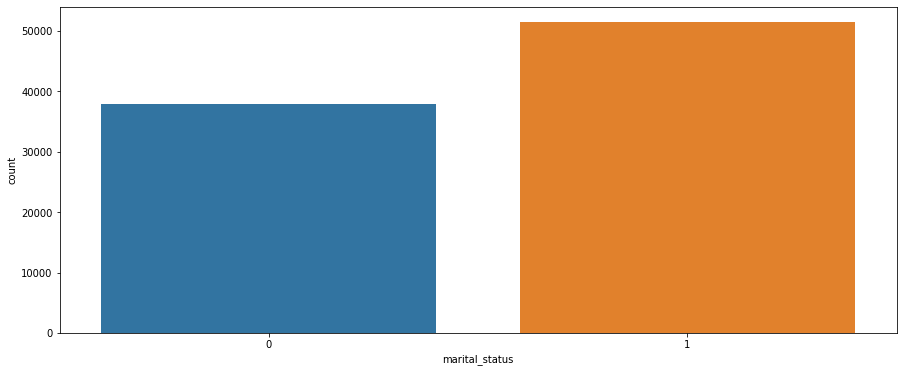

In [410]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='marital_status', ax=ax)
plt.show()

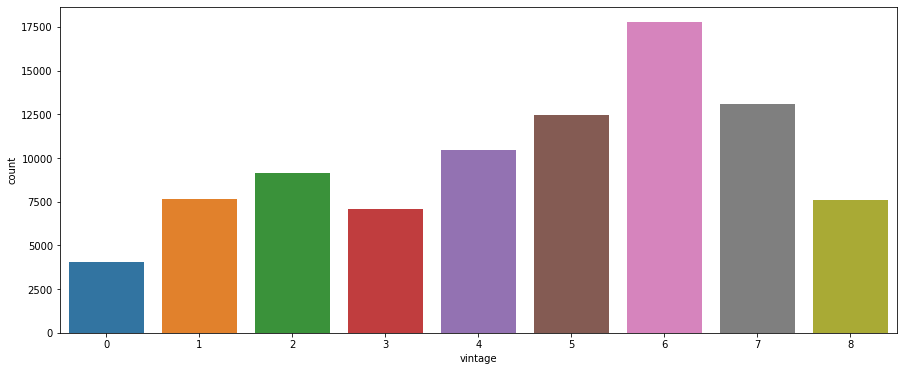

In [411]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='vintage', ax=ax)
plt.show()

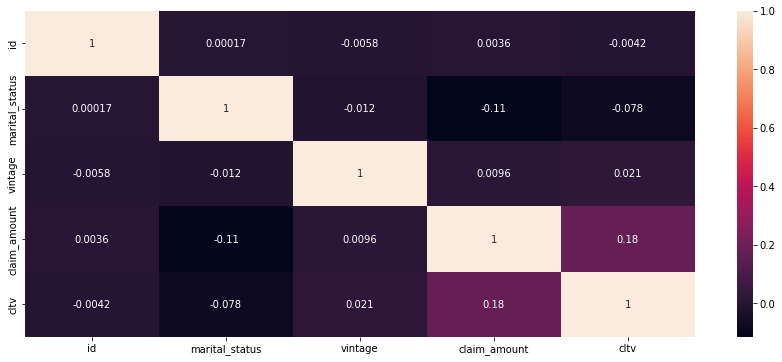

In [412]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [413]:
df.groupby('marital_status')['claim_amount'].agg(['min', 'max', 'mean'])

,min,max,mean
marital_status,,,
0,0,31894,4788.031411
1,0,28939,4029.493974


Do people who have high claim amount have high cltv?

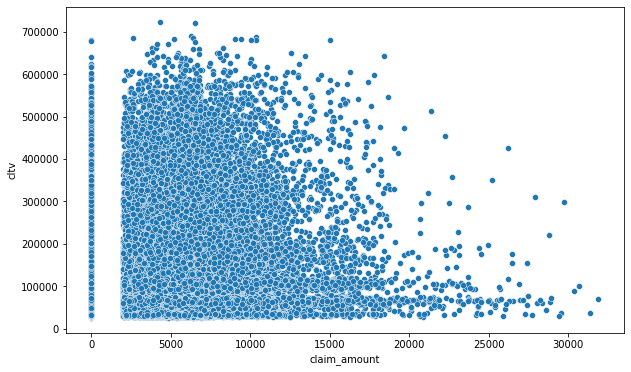

In [414]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='claim_amount', y='cltv')
plt.show()

What is up with 0 claim amount? No claim or outlier?

<AxesSubplot:ylabel='Frequency'>

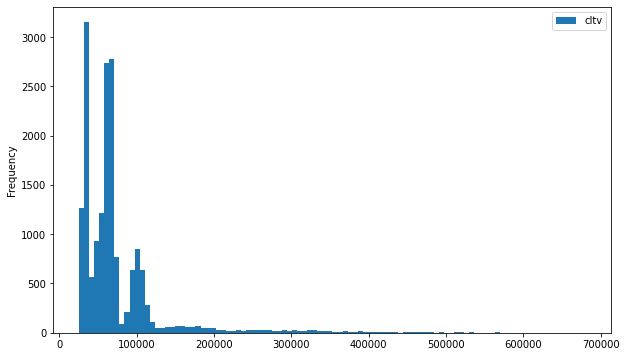

In [415]:
df.loc[df['claim_amount'] == 0, ['cltv']].plot(kind='hist', bins=100, figsize=(10 , 6))

In [416]:
df.loc[df['claim_amount'] == 0, ['area']].value_counts(normalize=True)

area 
Rural    0.719201
Urban    0.280799
dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

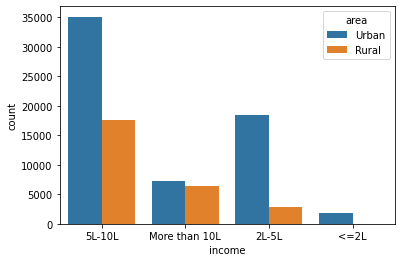

In [417]:
sns.countplot(data=df, x='income', hue='area')

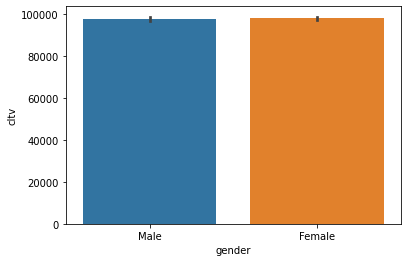

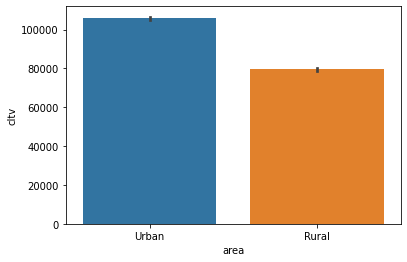

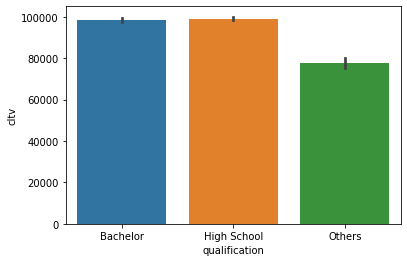

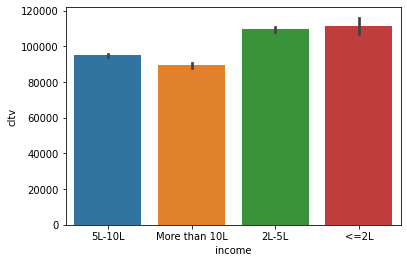

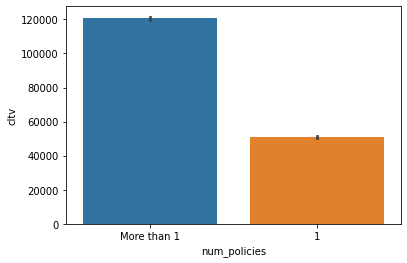

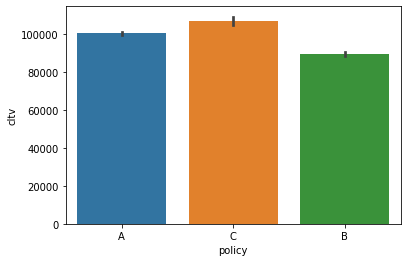

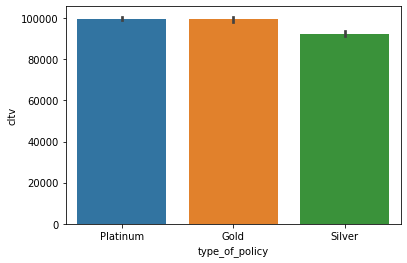

In [418]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
for col in cat_col:
    fig, ax = plt.subplots()
    sns.barplot(data=df, x=col, y='cltv', ax=ax)
    plt.show()

In [419]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [420]:
df.groupby('area')['income'].value_counts()

area   income       
Rural  5L-10L           17637
       More than 10L     6475
       2L-5L             2810
       <=2L                15
Urban  5L-10L           35079
       2L-5L            18348
       More than 10L     7189
       <=2L              1839
Name: income, dtype: int64

In [421]:
df['income'].apply(lambda x: x.split('-'))

0              [5L, 10L]
1              [5L, 10L]
2              [5L, 10L]
3              [5L, 10L]
4        [More than 10L]
              ...       
89387    [More than 10L]
89388          [5L, 10L]
89389          [5L, 10L]
89390           [2L, 5L]
89391          [5L, 10L]
Name: income, Length: 89392, dtype: object

1. Number of claims made by the customer in the past
2. Number of years since the last policy was issued
3. Number of years since the last claim was made
4. Number of years since the last policy renewal
5. Number of policies cancelled by the customer 
6. Occupation of the customer 
7. Number of years since the first policy was issued 
8. Average claim amount
9. Average premium amount

Give ratio features

1. Claim amount to income ratio
2. Premium amount to income ratio
3. Number of policies to vintage ratio
4. Number of claims to vintage ratio
5. Number of years since last policy was issued to vintage ratio
6. Number of years since last claim was made to vintage ratio
7. Number of years since last policy renewal to vintage ratio

In [422]:
df['age'] = df['vintage']/365.25

In [423]:
df['family_size'] = np.where(df['marital_status']==1, 2, 1)

In [424]:
df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [425]:
df['num_policies'].unique()

array(['More than 1', '1'], dtype=object)

In [426]:
num_policies = df['num_policies']
type_of_policy = df['type_of_policy']
df['spending_power'] =  np.where((num_policies=='More than 1') & (type_of_policy=='Silver'), 3,
                        np.where((num_policies=='More than 1') & (type_of_policy=='Gold'), 2,
                        np.where((num_policies=='More than 1') & (income=='Platinum'), 1, 
                        np.where((num_policies=='1') & (type_of_policy=='Silver'), 6,
                        np.where((num_policies=='1') & (type_of_policy=='Gold'), 4,
                        np.where((num_policies=='1') & (type_of_policy=='Platinum'), 2, 0))))))

In [427]:
qualification = df['qualification']
df['education_level'] = (np.where(qualification=='Other', 3,
                         np.where(qualification=='Bachelor', 2,
                         np.where(qualification=='High School', 1, 0))))

In [428]:
df['income'].unique()

array(['5L-10L', 'More than 10L', '2L-5L', '<=2L'], dtype=object)

In [429]:
200000 + 500000

700000

In [430]:
700000 / 2

350000.0

In [431]:
income = df['income']
area = df['area']
df['spending_power'] =  np.where((area=='Urban') & (income=='5L - 10L'), 150000,
                        np.where((area=='Urban') & (income=='2L - 5L'), 350000,
                        np.where((area=='Urban') & (income=='<=2L'), 200000, 
                        np.where((area=='Urban') & (income=='More than 10L'), 1000000,
                        np.where((area=='Rural') & (income=='5L - 10L'), 100000,
                        np.where((area=='Rural') & (income=='2L - 5L'), 350000,
                        np.where((area=='Rural') & (income=='<=2L'), 200000, 
                        np.where((area=='Rural') & (income=='More than 10L'), 1000000, 0))))))))

In [432]:
5790 / 150000

0.0386

In [433]:
pd.set_option('display.max_columns', 26)
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,age,family_size,spending_power,education_level
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308,0.013689,2,0,2
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400,0.021903,1,0,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212,0.021903,2,0,2
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920,0.019165,1,0,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736,0.016427,2,1000000,1


In [463]:
df.isnull().sum()

id                                 0
gender                             0
area                               0
qualification                      0
income                             0
marital_status                     0
vintage                            0
claim_amount                       0
num_policies                       0
policy                             0
type_of_policy                     0
cltv                               0
age                                0
family_size                        0
spending_power                     0
education_level                    0
income_int                         0
risk_factor                        0
no_of_claims                       0
policy_tenure                      0
avg_premium_amount                 0
num_policies_int                   0
claim_amt_to_income_ratio          0
premium_amt_to_income_ratio        0
no_of_policies_to_vintage_ratio    0
no_of_claims_to_vintage_ratio      0
dtype: int64

In [462]:
df.loc[df['claim_amt_to_income_ratio'].isnull(), :]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,age,family_size,spending_power,education_level,income_int,risk_factor,no_of_claims,policy_tenure,avg_premium_amount,num_policies_int,claim_amt_to_income_ratio,premium_amt_to_income_ratio,no_of_policies_to_vintage_ratio,no_of_claims_to_vintage_ratio


In [ ]:
df['claim_amt_to_income_ratio'].fillna(0, axis=0, inplace=True)

In [438]:
df['claim_amount']

0        5790
1        5080
2        2599
3           0
4        3508
         ... 
89387       0
89388    3897
89389    3363
89390       0
89391       0
Name: claim_amount, Length: 89392, dtype: int64

In [439]:
df[~df.isin([np.nan, np.inf, -np.inf])]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,age,family_size,spending_power,education_level
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308,0.013689,2,0,2
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400,0.021903,1,0,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212,0.021903,2,0,2
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920,0.019165,1,0,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736,0.016427,2,1000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736,0.016427,1,1000000,1
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596,0.000000,2,0,2
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120,0.010951,1,0,2
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772,0.021903,1,0,1


In [461]:
df[df.isin([np.inf, -np.inf])].any()

id                                 False
gender                             False
area                               False
qualification                      False
income                             False
marital_status                     False
vintage                            False
claim_amount                       False
num_policies                       False
policy                             False
type_of_policy                     False
cltv                               False
age                                False
family_size                        False
spending_power                     False
education_level                    False
income_int                         False
risk_factor                        False
no_of_claims                       False
policy_tenure                      False
avg_premium_amount                 False
num_policies_int                   False
claim_amt_to_income_ratio          False
premium_amt_to_income_ratio        False
no_of_policies_t

In [441]:
df[df.isin([np.inf, -np.inf]).any(1)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,age,family_size,spending_power,education_level


In [460]:
np.isinf(df['claim_amt_to_income_ratio'])

0        False
1        False
2        False
3        False
4        False
         ...  
89387    False
89388    False
89389    False
89390    False
89391    False
Name: claim_amt_to_income_ratio, Length: 89392, dtype: bool

In [453]:
df['claim_amt_to_income_ratio'] = df['claim_amt_to_income_ratio'].replace(np.inf, np.nan)
df['risk_factor'] = df['risk_factor'].replace(np.inf, np.nan)
df['premium_amt_to_income_ratio'] = df['premium_amt_to_income_ratio'].replace(np.inf, np.nan)
df['no_of_policies_to_vintage_ratio'] = df['no_of_policies_to_vintage_ratio'].replace(np.inf, np.nan)
df['no_of_claims_to_vintage_ratio'] = df['no_of_claims_to_vintage_ratio'].replace(np.inf, np.nan)

In [454]:
df['claim_amt_to_income_ratio'] = df['claim_amt_to_income_ratio'].fillna(0, axis=0)
df['risk_factor'] = df['risk_factor'].fillna(0, axis=0)
df['premium_amt_to_income_ratio'] = df['premium_amt_to_income_ratio'].fillna(0, axis=0)
df['no_of_policies_to_vintage_ratio'] = df['no_of_policies_to_vintage_ratio'].fillna(0, axis=0)
df['no_of_claims_to_vintage_ratio'] = df['no_of_claims_to_vintage_ratio'].fillna(0, axis=0)

In [445]:
income = df['income']
df['income_int'] = np.where(income=='5L-10L', 75000, 
                              np.where(income=='<=2L', 15000, 
                              np.where(income=='More than 10L', 120000, 0)))

In [446]:
claim_amount = df['claim_amount']
income = df['income_int']
df['risk_factor'] = claim_amount/income

In [447]:
df['no_of_claims'] = df['claim_amount'].count()

In [448]:
policy = df['policy']
df['policy_tenure'] = np.where(policy=='A', 3, 
                                 np.where(policy=='B', 2, 
                                 np.where(policy=='C', 1, 0)))

df['avg_premium_amount'] = df['policy_tenure'].mean()

In [449]:
df['num_policies']

0        More than 1
1        More than 1
2        More than 1
3        More than 1
4        More than 1
            ...     
89387    More than 1
89388    More than 1
89389    More than 1
89390    More than 1
89391    More than 1
Name: num_policies, Length: 89392, dtype: object

In [450]:
num_policies_int_ = df['num_policies']
df['num_policies_int'] = np.where(num_policies_int_=='More than 1', 2,
                                 np.where(num_policies_int_=='1', 1, 0))

In [451]:
# Claim amount to income ratio
df['claim_amt_to_income_ratio'] = df['claim_amount']/df['income_int']

# Premium amount to income ratio
df['premium_amt_to_income_ratio'] = df['policy_tenure']/df['income_int']

# Number of policies to vintage ratio
df['no_of_policies_to_vintage_ratio'] = df['num_policies_int']/df['vintage']

In [452]:
# Number of claims to vintage ratio
df['no_of_claims_to_vintage_ratio'] = df['claim_amount'].count()/df['vintage']

1. Age: Age of the customer
2. Education: Level of Education of the customer
3. Occupation: Occupation of the customer
4. Credit_Score: Credit Score of the customer
5. Number_of_dependents: Number of dependents of the customer
6. Total_assets: Total assets of the customer
7. Total_liabilities: Total liabilities of the customer
8. Net_worth: Difference between total assets and total liabilities of the customer
9. Income_velocity: Ratio of Income earned in a year to the number of months in a year
10. Years_at_current_residence: Number of years the customer has been living at the same residence
11. Num_claims: Total no. of claims in the past
12. Claim_amount_per_policy: Average claim amount per policy of the customer
13. Claims_ratio: Ratio of number of claims to number of policies of the customer
14. Policy_preference: Number of policies in each type of policy preferred by the customer
15. Loyalty_score: Score given to the customer based on the number of years since the first policy date

1. Age: Use vintage column to calculate the age of the customer.
2. Education: Use the qualification column to determine the level of education of the customer.
3. Occupation: Use the income column to determine the occupation of the customer.
4. Credit_Score: Use the income, num_policies, vintage and claim_amount to calculate the credit score of the customer.
5. Number_of_dependents: Use the marital_status column to determine the number of dependents of the customer.
6. Total_assets: Use the income and net worth of the customer to calculate the total assets.
7. Total_liabilities: Use the income and net worth of the customer to calculate the total liabilities.
8. Net_worth: Calculate the difference between the total assets and total liabilities.
9. Income_velocity: Calculate the ratio of income earned in a year to the number of months in a year.
10. Years_at_current_residence: Use the vintage column to calculate the number of years the customer has been living at the same residence.
11. Num_claims: Use the claim_amount column to calculate the total number of claims in the past.
12. Claim_amount_per_policy: Use the claim_amount and num_policies columns to calculate the average claim amount per policy of the customer.
13. Claims_ratio: Calculate the ratio of number of claims to number of policies of the customer.
14. Policy_preference: Use the type_of_policy column to calculate the number of policies in each type of policy preferred by the customer.
15. Loyalty_score: Use the vintage column to calculate the score given to the customer based on the number of years since the first policy date.

Ratio features: 
1. Ratio of claim_amount to income 
2. Ratio of num_policies to vintage 
3. Ratio of vintage to policy

Frequency features: 
1. Frequency of customers based on gender 
2. Frequency of customers based on area 
3. Frequency of customers based on qualification 
4. Frequency of customers based on income 
5. Frequency of customers based on marital status 
6. Frequency of customers based on vintage 
7. Frequency of customers based on claim amount 
8. Frequency of customers based on number of policies 
9. Frequency of customers based on type of policy 
10.Frequency of customers based on CLTV

Probability features: 
1. Probability of claim amount given income 
2. Probability of num_policies given vintage 
3. Probability of vintage given policy

In [471]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object' if col not in 'income']
cat_col

['num_policies', 'policy', 'type_of_policy']

In [472]:
for col in cat_col:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])

In [456]:
num_col = [col for col in df.columns if df[col].dtypes in ['int64', 'float64']]
num_col

['id',
 'marital_status',
 'vintage',
 'claim_amount',
 'cltv',
 'age',
 'risk_factor',
 'no_of_claims',
 'avg_premium_amount',
 'claim_amt_to_income_ratio',
 'premium_amt_to_income_ratio',
 'no_of_policies_to_vintage_ratio',
 'no_of_claims_to_vintage_ratio']

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               89392 non-null  int64  
 1   gender                           89392 non-null  int32  
 2   area                             89392 non-null  int32  
 3   qualification                    89392 non-null  int32  
 4   marital_status                   89392 non-null  int64  
 5   vintage                          89392 non-null  int64  
 6   claim_amount                     89392 non-null  int64  
 7   num_policies                     89392 non-null  int32  
 8   policy                           89392 non-null  int32  
 9   type_of_policy                   89392 non-null  int32  
 10  cltv                             89392 non-null  int64  
 11  age                              89392 non-null  float64
 12  family_size       

In [458]:
df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [459]:
col 

'type_of_policy'

In [ ]:
'''df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2})
df['area'] = df['area'].replace({'Urban': 1, 'Rural': 2})
df['qualification'] = df['qualification'].replace({'Bachelor': 1, 'High School': 2, 'Other': 3})
df['num_policies'] = df['num_policies'].replace({'1': 1, 'More than 1': 2})
df['policy'] = df['policy'].replace({'A': 1, 'B': 2, 'C': 3})
df['type_of_policy'] = df['type_of_policy'].replace({'Silver': 1, 'Gold': 2, 'Platinum': 3})'''

In [465]:
df.drop('income', axis=1, inplace=True)

In [474]:
df.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,age,family_size,spending_power,education_level,income_int,risk_factor,no_of_claims,policy_tenure,avg_premium_amount,num_policies_int,claim_amt_to_income_ratio,premium_amt_to_income_ratio,no_of_policies_to_vintage_ratio,no_of_claims_to_vintage_ratio
0,1,1,1,0,1,5,5790,1,0,1,64308,0.013689,2,0,2,75000,0.077200,89392,3,2.542901,2,0.077200,0.000040,0.400000,17878.400000
1,2,1,0,1,0,8,5080,1,0,1,515400,0.021903,1,0,1,75000,0.067733,89392,3,2.542901,2,0.067733,0.000040,0.250000,11174.000000
2,3,1,1,0,1,8,2599,1,0,1,64212,0.021903,2,0,2,75000,0.034653,89392,3,2.542901,2,0.034653,0.000040,0.250000,11174.000000
3,4,0,0,1,0,7,0,1,0,1,97920,0.019165,1,0,1,75000,0.000000,89392,3,2.542901,2,0.000000,0.000040,0.285714,12770.285714
4,5,1,1,1,1,6,3508,1,0,0,59736,0.016427,2,1000000,1,120000,0.029233,89392,3,2.542901,2,0.029233,0.000025,0.333333,14898.666667


In [476]:
import statsmodels.api as sm

In [482]:
X = df.drop(['cltv', 'no_of_policies_to_vintage_ratio', 'no_of_claims_to_vintage_ratio', 'premium_amt_to_income_ratio'], axis=1)
y = df['cltv']
X_constant = sm.add_constant(X)
lin_reg=sm.OLS(y, X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1208.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:21:00   Log-Likelihood:            -1.1400e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89378   BIC:                         2.280e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                           -0.0107      0.011     -0.991      0.322      -0.032       0.010
gender                     2156.8575    568.569      3.793      0.000    1042.469    3271.246
area                       7697.7211    699.416     11.006      0.000    6326.872    9068.571
qualification              -793.0393    246.564     -3.216      0.001   -1276.302    -309.777
marital_status            -3355.8551    286.406    -11.717      0.000   -3917.209   -2794.501
vintage                      51.4552    122.388      0.420      0.674    -188.425     291.335
claim_amount                  2.9401      0.110     26.847      0.000       2.725       3.155
num_policies               3.237e+04    304.894    106.162      0.000    3.18e+04     3.3e+04
policy                      354.9422    216.846      1.637      0.102     -70.073     779.957
type_of_policy            -1772.5029    411.988     -4.302      0.000   -2579.995    -965.011
age                           0.1409      0.335      0.420      0.674      -0.516       0.798
family_size               -3355.8551    286.406    -11.717      0.000   -3917.209   -2794.501
spending_power               -0.0006      0.001     -0.602      0.547      -0.003       0.001
education_level             793.0393    246.564      3.216      0.001     309.777    1276.302
income_int                   -0.0440      0.009     -4.681      0.000      -0.062      -0.026
risk_factor               -4437.7262   2310.320     -1.921      0.055   -8965.931      90.479
no_of_claims                  0.1697      0.018      9.398      0.000       0.134       0.205
policy_tenure              -354.9422    216.846     -1.637      0.102    -779.957      70.073
avg_premium_amount         4.827e-06   5.14e-07      9.398      0.000    3.82e-06    5.83e-06
num_policies_int           3.237e+04    304.894    106.162      0.000    3.18e+04     3.3e+04
claim_amt_to_income_ratio -4437.7262   2310.320     -1.921      0.055   -8965.931      90.479
==============================================================================
Omnibus:                    51266.191   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404796.964
Skew:                           2.737   Prob(JB):                         0.00
Kurtosis:                      11.872   Cond. No.                     5.04e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [478]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [481]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif}, index=X_constant.columns)

,vif
id,1.000175
gender,1.017110
area,1.318208
qualification,inf
marital_status,inf
vintage,inf
claim_amount,2.619916
num_policies,inf
policy,inf
type_of_policy,1.010919


In [485]:
df.to_csv('updated_frame.csv', index=False)

1. Frequency of customers based on gender
freq_gender = df['gender'].value_counts()

2. Frequency of customers based on area
freq_area = df['area'].value_counts()

3. Frequency of customers based on qualification
freq_qualification = df['qualification'].value_counts()

4. Frequency of customers based on income
freq_income = df['income'].value_counts()

5. Frequency of customers based on marital status
freq_marital_status = df['marital_status'].value_counts()

6. Frequency of customers based on vintage
freq_vintage = df['vintage'].value_counts()

7. Frequency of customers based on claim amount
freq_claim_amount = df['claim_amount'].value_counts()

8. Frequency of customers based on number of policies
freq_num_policies = df['num_policies'].value_counts()

9. Frequency of customers based on type of policy


1. Average claim amount per policy
2. Average income per policy
3. Average vintage per policy
4. Average CLTV per policy
5. Average number of policies per customer
6. Percentage of customers with a particular policy type
7. Percentage of customers with a particular marital status
8. Percentage of customers with a particular area
9. Percentage of customers with a particular qualification
10.Average income by gender
11.Average vintage by gender
12.Average CLTV by gender
13.Average claim amount by marital status
14.Average income by marital status
15.Average vintage by marital status
16.Average CLTV by marital status
17.Average claim amount by area
18.Average income by area
19.Average vintage by area
20.Average CLTV by area
21.Average claim amount by qualification
22.Average income by qualification
23.Average vintage by qualification
24.Average CLTV by qualification

1. Ratio of active policies to vintage
2. Ratio of claim amount to income
3. Average CLTV per policy type
4. Ratio of number of policies to vintage
5. Ratio of vintage to policy
6. Average CLTV per area
7. Average CLTV per marital status
8. Average CLTV per qualification
9. Percentage of customers with a claim amount greater than a particular amount
10.Average vintage by gender
11.Average income by gender
12.Average claim amount by gender
13.Average vintage by marital status
14.Average income by marital status
15.Average claim amount by marital status
16.Average vintage by area
17.Average income by area
18.Average claim amount by area
19.Average vintage by qualification
20.Average income by qualification
21.Average claim amount by qualification
22.Number of policies by gender
23.Number of policies by marital status
24.Number of policies by area
25.Number of policies by qualification

1. Average number of policies per customer
2. Average income per policy
3. Average claim amount per policy
4. Ratio of claim amount to income
5. Ratio of num_policies to vintage
6. Ratio of vintage to policy
7. Average vintage by gender
8. Average income by gender
9. Average claim amount by gender
10.Average vintage by marital status
11.Average income by marital status
12.Average claim amount by marital status
13.Average vintage by area
14.Average income by area
15.Average claim amount by area
16.Average vintage by qualification
17.Average income by qualification
18.Average claim amount by qualification
19.Percentage of customers with a particular policy type
20.Percentage of customers with a particular marital status
21.Percentage of customers with a particular area
22.Percentage of customers with a particular qualification
23.Percentage of customers with a claim amount greater than a particular amount
24.Ratio of active policies to vintage
25.Average CLTV per policy type
26.Average CLTV per area
27.Average CLTV per marital status
28.Average CLTV per qualification

In [ ]:
df['freq_gender'] = df['gender'].value_counts()
df['freq_area'] = df['area'].value_counts()
df['freq_qualification'] = df['qualification'].value_counts()
df['freq_income'] = df['income'].value_counts()
df['freq_marital_status'] = df['marital_status'].value_counts()
df['freq_vintage'] = df['vintage'].value_counts()
df['freq_claim_amount'] = df['claim_amount'].value_counts()
df['freq_num_policies'] = df['num_policies'].value_counts()

In [1]:
df['average_amount_claim_per_policy'] = df[df['policy'] == 'particular_policy_type'].shape[0] / df.shape[0]
df[df['marital_status'] == 'particular_marital_status'].shape[0] / df.shape[0]
df[df['area'] == 'particular_area'].shape[0] / df.shape[0]
df[df['qualification'] == 'particular_qualification'].shape[0] / df.shape[0]
df.groupby('gender').income.mean()
df.groupby('gender').vintage.mean()
df.groupby('gender').CLTV.mean()
df.groupby('marital_status').claim_amount.mean()
df.groupby('marital_status').income.mean()
df.groupby('marital_status').vintage.mean()
df.groupby('marital_status').CLTV.mean()
df.groupby('area').claim_amount.mean()
df.groupby('area').income.mean()
df.groupby('area').vintage.mean()
df.groupby('area').CLTV.mean()
df.groupby('qualification').claim_amount.mean()
df.groupby('qualification').income.mean()
df.groupby('qualification').vintage.mean()
df.groupby('qualification').CLTV.mean()
df[df['policy_status'] == 'Active'].shape[0] / df.shape[0]
df['claim_amount'].sum() / df['income'].sum()
df.groupby('type_of_policy').CLTV.mean()
df['num_policies'].sum() / df['vintage'].sum()
df['vintage'].sum() / df['policy'].shape[0]
df.groupby('area').CLTV.mean()
df.groupby('marital_status').CLTV.mean()
df.groupby('qualification').CLTV.mean()
df[df['claim_amount'] > particular_amount].shape[0] / df.shape[0]
df.groupby('gender').num_policies.sum()
df.groupby('marital_status').num_policies.sum()
df.groupby('area').num_policies.sum()
df.groupby('qualification').num_policies.sum()

NameError: name 'df' is not defined

In [ ]:
df[df['policy_status'] == 'Active'].shape[0] / df.shape[0]
df['claim_amount'].sum() / df['income'].sum()
df.groupby('type_of_policy').CLTV.mean()
df['num_policies'].sum() / df['vintage'].sum()
df['vintage'].sum() / df['policy'].shape[0]
df.groupby('area').CLTV.mean()
df.groupby('marital_status').CLTV.mean()
df.groupby('qualification').CLTV.mean()
df[df['claim_amount'] > particular_amount].shape[0] / df.shape[0]
df.groupby('gender').vintage.mean()
df.groupby('gender').income.mean()
df.groupby('gender').claim_amount.mean()
df.groupby('marital_status').vintage.mean()
df.groupby('marital_status').income.mean()
df.groupby('marital_status').claim_amount.mean()
df.groupby('area').vintage.mean()
df.groupby('area').income.mean()
df.groupby('area').claim_amount.mean()
df.groupby('qualification').vintage.mean()
df.groupby('qualification').income.mean()
df.groupby('qualification').claim_amount.mean()
df.groupby('gender').num_policies.sum()
df.groupby('marital_status').num_policies.sum()
df.groupby('area').num_policies.sum()
df.groupby('qualification').num_policies.sum()

In [ ]:
df['num_policies'].mean()
df['income'].mean() / df['policy'].shape[0]
df['claim_amount'].mean() / df['policy'].shape[0]
df['claim_amount'].sum() / df['income'].sum()
df['num_policies'].sum() / df['vintage'].sum()
df['vintage'].sum() / df['policy'].shape[0]
df.groupby('gender').vintage.mean()
df.groupby('gender').income.mean()
df.groupby('gender').claim_amount.mean()
df.groupby('marital_status').vintage.mean()
df.groupby('marital_status').income.mean()
df.groupby('marital_status').claim_amount.mean()
df.groupby('area').vintage.mean()
df.groupby('area').income.mean()
df.groupby('area').claim_amount.mean()
df.groupby('qualification').vintage.mean()
df.groupby('qualification').income.mean()
df.groupby('qualification').claim_amount.mean()
df[df['type_of_policy'] == particular_policy_type].shape[0] / df.shape[0]
df[df['marital_status'] == particular_marital_status].shape[0] / df.shape[0]
df[df['area'] == particular_area].shape[0] / df.shape[0]
df[df['qualification'] == particular_qualification].shape[0] / df.shape[0]
df[df['claim_amount'] > particular_amount].shape[
df[df['claim_amount'] > particular_amount].shape[0] / df.shape[0]
df[df['policy_status'] == 'Active'].shape[0] / df.shape[0]
df.groupby('type_of_policy').CLTV.mean()
df.groupby('area').CLTV.mean()
df.groupby('marital_status').CLTV.mean()
df.groupby('qualification').CLTV.mean()

In [486]:
test = pd.read_csv('test_koRSKBP.csv')
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [489]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,0,0,1,1,0,6,2134,1,1,2
1,89394,0,1,1,0,0,4,4102,1,0,1
2,89395,1,0,1,1,1,7,2925,1,1,0
3,89396,0,0,0,3,1,2,0,1,1,2
4,89397,0,1,1,0,0,5,14059,1,1,2


In [487]:
cat_cols = [col for col in test.columns if test[col].dtypes == 'object']
test[cat_cols]

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Female,Rural,High School,5L-10L,More than 1,B,Silver
1,Female,Urban,High School,2L-5L,More than 1,A,Platinum
2,Male,Rural,High School,5L-10L,More than 1,B,Gold
3,Female,Rural,Bachelor,More than 10L,More than 1,B,Silver
4,Female,Urban,High School,2L-5L,More than 1,B,Silver
...,...,...,...,...,...,...,...
59590,Male,Rural,Bachelor,5L-10L,1,A,Silver
59591,Male,Urban,High School,5L-10L,1,C,Gold
59592,Female,Urban,High School,2L-5L,More than 1,B,Platinum
59593,Male,Rural,Bachelor,5L-10L,More than 1,A,Silver


In [488]:
for col in cat_cols:
    le = LabelEncoder()
    test.loc[:, col] = le.fit_transform(test[col])

In [490]:
test.to_csv('updated_test_frame.csv', index=False)